## Simple Linear Regression Using Tensorflow

Examples modified from Hands-On Machine Learning with Scikit-Learn & Tensorflow

Using some matrix algebra we can calculate coefficients for a linear regression model. Theta is this vector and it is calculated with the formula below where $X$ is a matrix of features and $y$ is the label vector. We will run this model below using Tensorflow.

$$
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^{T}\cdot y
$$

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
housing = fetch_california_housing()
m, n = housing.data.shape

In [3]:
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

We add a row of ones. This will give us a y intercept.

In [4]:
X = tf.constant(
    housing_data_plus_bias, 
    dtype = tf.float32,
    name = "X"
)

y = tf.constant(
    housing.target.reshape(-1, 1),
    dtype = tf.float32,
    name = "y"
)

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

Next will actually run the model we built above.

The theta output is shown below. The first value is the intercept.

We can visualize our predicted values versus the actual values. Perfectly predicted values will result in a straight-line.

## Implementing Gradient Descent

### Manually Computing the Gradients

In [5]:
n_epochs = 1000
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
df = pd.DataFrame(housing_data_plus_bias, columns = ['Bias', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
df = df.assign(target=housing.target)
learning_rate = 0.01

In [6]:
x_col = ['Bias', 'MedInc']
x_targ = df[['Bias', 'MedInc']].as_matrix()
X = tf.constant(
    x_targ,
    dtype=tf.float32,
    name = "X"
)

y = tf.constant(
    housing.target.reshape(-1, 1),
    dtype=tf.float32,
    name = "y"
)

theta = tf.Variable(
    tf.random_uniform([1 + 1, 1], -1.0, 1.0),
    name = "theta"
)

y_pred = tf.matmul(X, theta, name = "predictions")

error = y_pred - y

# Computes the mean of elements across dimensions of a tensor
mse = tf.reduce_mean(
    tf.square(error), 
    name = "mse"
)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
thetas = []

with tf.Session() as sess:

    sess.run(init)
    
    for epoch in range(n_epochs):
        
        if epoch % 10 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
            thetas.append(theta.eval())
        sess.run(training_op)
        

Epoch 0 MSE = 3.5066354
Epoch 10 MSE = 0.7177203
Epoch 20 MSE = 0.7163884
Epoch 30 MSE = 0.7152924
Epoch 40 MSE = 0.7142758
Epoch 50 MSE = 0.7133319
Epoch 60 MSE = 0.71245515
Epoch 70 MSE = 0.7116419
Epoch 80 MSE = 0.71088713
Epoch 90 MSE = 0.7101863
Epoch 100 MSE = 0.7095359
Epoch 110 MSE = 0.70893234
Epoch 120 MSE = 0.70837206
Epoch 130 MSE = 0.70785177
Epoch 140 MSE = 0.7073686
Epoch 150 MSE = 0.706921
Epoch 160 MSE = 0.7065056
Epoch 170 MSE = 0.70611936
Epoch 180 MSE = 0.7057611
Epoch 190 MSE = 0.70542854
Epoch 200 MSE = 0.7051196
Epoch 210 MSE = 0.7048336
Epoch 220 MSE = 0.7045675
Epoch 230 MSE = 0.70432067
Epoch 240 MSE = 0.7040914
Epoch 250 MSE = 0.7038788
Epoch 260 MSE = 0.7036815
Epoch 270 MSE = 0.7034983
Epoch 280 MSE = 0.7033284
Epoch 290 MSE = 0.7031704
Epoch 300 MSE = 0.7030239
Epoch 310 MSE = 0.70288825
Epoch 320 MSE = 0.7027619
Epoch 330 MSE = 0.7026449
Epoch 340 MSE = 0.7025359
Epoch 350 MSE = 0.70243496
Epoch 360 MSE = 0.7023417
Epoch 370 MSE = 0.70225453
Epoch 380 MSE

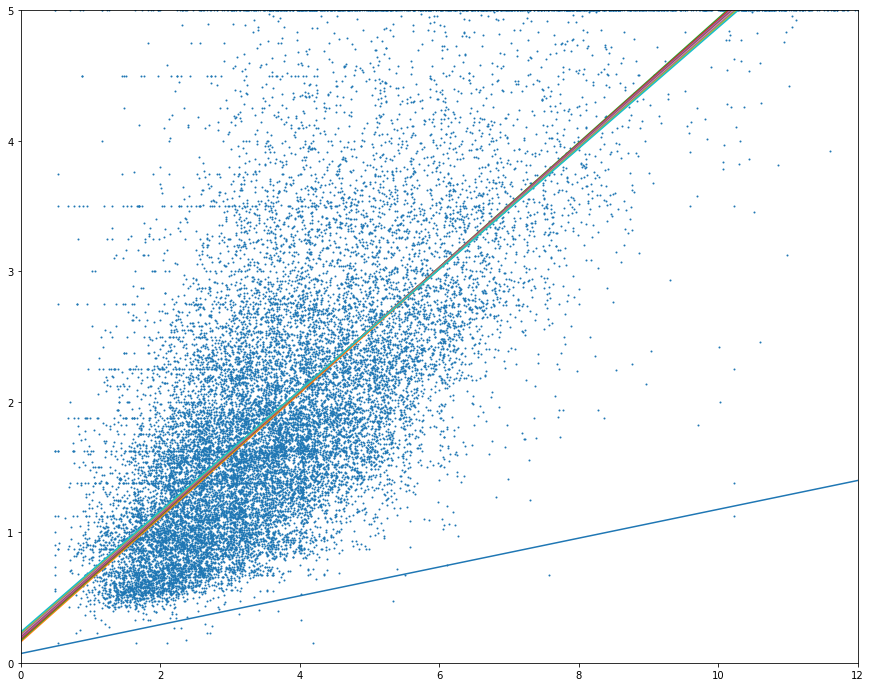

In [ ]:
plt.figure(figsize=(15,12))
plt.xlim((0, 12))
plt.ylim((0, 5))
plt.scatter(df['MedInc'], df['target'], s = 1)
x = np.linspace(0, 14, 100)
for i in np.arange(10): 
    y = thetas[i][0] + x * thetas[i][1]
    plt.plot(x, y)  
plt.show()

In [ ]:
plot = pd.plotting.scatter_matrix(df, figsize=(20, 12))

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


In [ ]:
plot = pd.plotting.scatter_matrix(df[['MedInc', 'target']])